Bilansihälvete ja kulude visualiseerimine

- prognoosi vs tegeliku tarbimise visualiseerimine
- päevase hälbe võrdlemine

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path("..").resolve()
data_dir = project_root / "data"

balance_with_imbalance_path = data_dir / "balance_with_imbalance.json"
settlement_daily_path = data_dir / "settlement_daily.json"

df = pd.read_json(balance_with_imbalance_path)
settlement_daily = pd.read_json(settlement_daily_path)

df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").reset_index(drop=True)

df.head(), settlement_daily.head()


(            timestamp  consumption_mwh  forecast_consumption_mwh  \
 0 2025-12-09 22:00:00           923.18                     823.4   
 1 2025-12-09 22:15:00           929.09                     817.6   
 2 2025-12-09 22:30:00           901.28                     807.9   
 3 2025-12-09 22:45:00           910.34                     823.9   
 4 2025-12-09 23:00:00           860.79                     760.3   
 
    production_mwh  forecast_production_mwh       date  hour  minute  \
 0          440.98                    401.0 2025-12-09    22       0   
 1          433.93                    373.7 2025-12-09    22      15   
 2          435.96                    376.0 2025-12-09    22      30   
 3          427.05                    377.2 2025-12-09    22      45   
 4          439.33                    349.0 2025-12-09    23       0   
 
    day_of_week  is_weekend  imbalance_price_eur_mwh  \
 0            1       False                    30.63   
 1            1       False           

Prognoositud tarbimine vs tegelik tarbimine

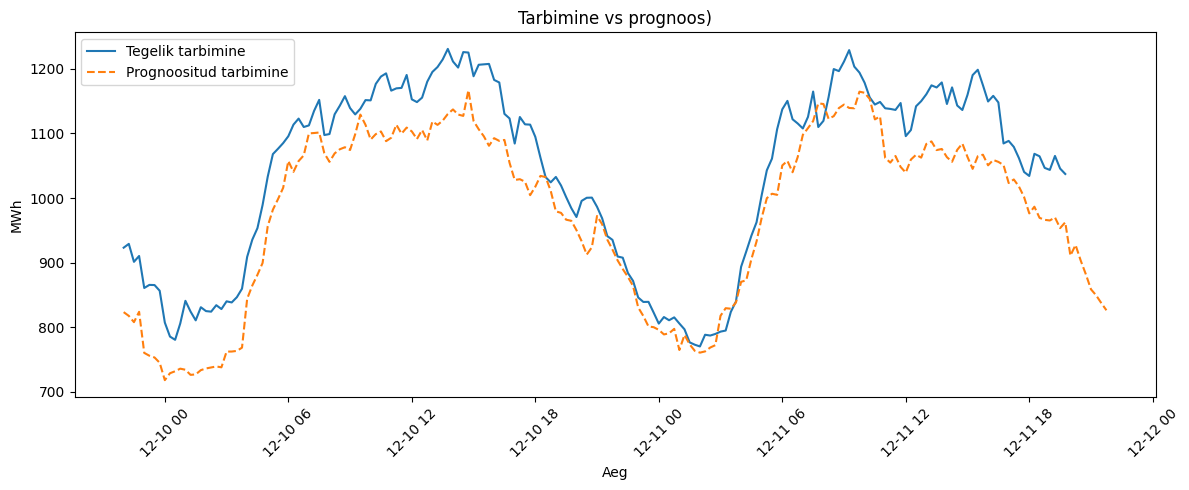

In [11]:
sample_days = 2
start_time = df["timestamp"].min()
end_time = start_time + pd.Timedelta(days=sample_days)

mask = (df["timestamp"] >= start_time) & (df["timestamp"] < end_time)
df_sample = df.loc[mask]

plt.figure(figsize=(12, 5))
plt.plot(df_sample["timestamp"], df_sample["consumption_mwh"], label="Tegelik tarbimine")
plt.plot(df_sample["timestamp"], df_sample["forecast_consumption_mwh"], label="Prognoositud tarbimine", linestyle="--")
plt.title(f"Tarbimine vs prognoos)")
plt.xlabel("Aeg")
plt.ylabel("MWh")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Netohälve ja bilansihind ajas

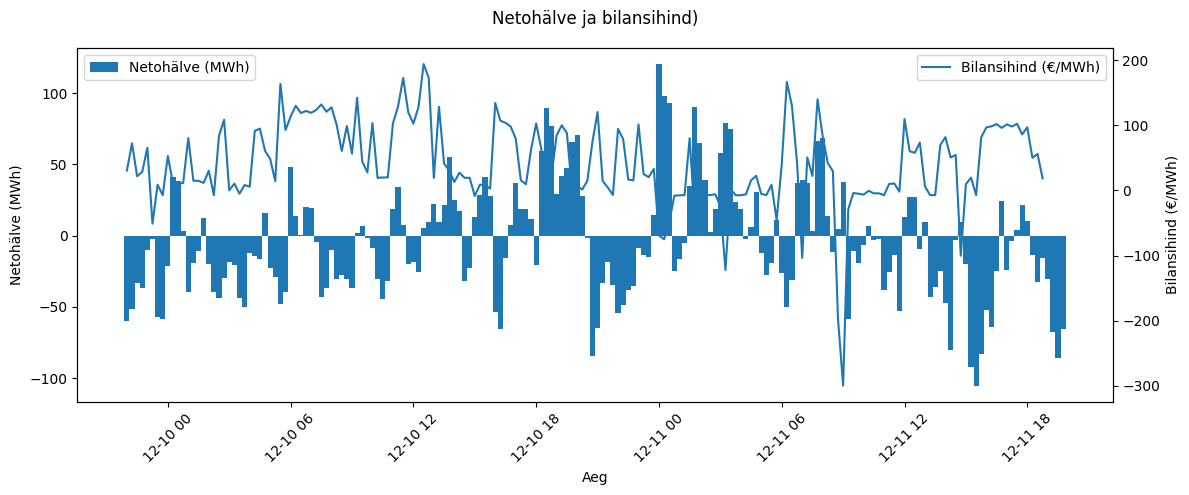

In [ ]:
sample_days = 2
start_time = df["timestamp"].min()
end_time = start_time + pd.Timedelta(days=sample_days)

mask = (df["timestamp"] >= start_time) & (df["timestamp"] < end_time)
df_sample = df.loc[mask].copy()

fig, ax1 = plt.subplots(figsize=(12, 5))

bar_width = 15 / (60 * 24)

# Netohälve
ax1.bar(
    df_sample["timestamp"],
    df_sample["net_imbalance_mwh"],
    width=bar_width,
    label="Netohälve (MWh)",
)
ax1.set_xlabel("Aeg")
ax1.set_ylabel("Netohälve (MWh)")
ax1.tick_params(axis="x", rotation=45)

# Bilansi hind
ax2 = ax1.twinx()
ax2.plot(
    df_sample["timestamp"],
    df_sample["imbalance_price_eur_mwh"],
    label="Bilansihind (€/MWh)",
)
ax2.set_ylabel("Bilansihind (€/MWh)")

fig.suptitle(f"Netohälve ja bilansihind)")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

fig.tight_layout()
plt.show()
